In [1]:
import numpy as np
import pandas as pd
from sklearn.linear_model import LinearRegression, LogisticRegression
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.svm import LinearSVC, LinearSVR, SVR, SVC

from utils import normalize_text_cols, load_arff_to_df, merge_levels, print_value_counts, find_value_counts_below, \
    text_cols_to_int, booleans_to_int

In [2]:
df: pd.DataFrame = load_arff_to_df('Autism-Adult-Data.arff')

In [3]:
df.isna().sum(axis=0)

A1_Score            0
A2_Score            0
A3_Score            0
A4_Score            0
A5_Score            0
A6_Score            0
A7_Score            0
A8_Score            0
A9_Score            0
A10_Score           0
age                 2
gender              0
ethnicity          95
jundice             0
austim              0
contry_of_res       0
used_app_before     0
result              0
age_desc            0
relation           95
Class/ASD           0
dtype: int64

In [4]:
df.dtypes

A1_Score            object
A2_Score            object
A3_Score            object
A4_Score            object
A5_Score            object
A6_Score            object
A7_Score            object
A8_Score            object
A9_Score            object
A10_Score           object
age                float64
gender              object
ethnicity           object
jundice             object
austim              object
contry_of_res       object
used_app_before     object
result             float64
age_desc            object
relation            object
Class/ASD           object
dtype: object

# Cleaning numerical columns

In [5]:
# remove rows with np.nan values in "age" as they make less that 5% of df
df = df[  ~df["age"].isna()].copy()

In [6]:
df.describe(percentiles=[0.25, 0.5, 0.75])

,age,result
count,702.000000,702.000000
mean,29.698006,4.883191
std,16.507465,2.498051
min,17.000000,0.000000
25%,21.000000,3.000000
50%,27.000000,4.000000
75%,35.000000,7.000000
max,383.000000,10.000000


In [7]:
df["age" ][df["age"]> 80]

52    383.0
Name: age, dtype: float64

In [8]:
# remove row with age == 383
df = df[df["age"] <100 ]
df.describe(percentiles=[0.25, 0.5, 0.75])

,age,result
count,701.000000,701.000000
mean,29.194009,4.888730
std,9.711526,2.495516
min,17.000000,0.000000
25%,21.000000,3.000000
50%,27.000000,4.000000
75%,35.000000,7.000000
max,64.000000,10.000000


In [9]:
df.dtypes

A1_Score            object
A2_Score            object
A3_Score            object
A4_Score            object
A5_Score            object
A6_Score            object
A7_Score            object
A8_Score            object
A9_Score            object
A10_Score           object
age                float64
gender              object
ethnicity           object
jundice             object
austim              object
contry_of_res       object
used_app_before     object
result             float64
age_desc            object
relation            object
Class/ASD           object
dtype: object

In [10]:
(df["age"] - df["age"].astype(int)).abs().sum()

0.0

In [11]:
(df["result"] - df["result"].astype(int)).abs().sum()

0.0

In [12]:
# results and age could actually be int
df["result"] = df["result"].astype(int)
df["age"] = df["age"].astype(int)

In [13]:
df.dtypes

A1_Score           object
A2_Score           object
A3_Score           object
A4_Score           object
A5_Score           object
A6_Score           object
A7_Score           object
A8_Score           object
A9_Score           object
A10_Score          object
age                 int64
gender             object
ethnicity          object
jundice            object
austim             object
contry_of_res      object
used_app_before    object
result              int64
age_desc           object
relation           object
Class/ASD          object
dtype: object

# Cleaning categorical columns

In [14]:
# Test answers A1-A10 to int
df[df.columns[:10]] = df[df.columns[:10]].astype(int)

In [15]:
# normalize text in text columns
df = normalize_text_cols(df)
# values None become "none" and denote "no data"
df.head()

,A1_Score,A2_Score,A3_Score,A4_Score,A5_Score,A6_Score,A7_Score,A8_Score,A9_Score,A10_Score,...,gender,ethnicity,jundice,austim,contry_of_res,used_app_before,result,age_desc,relation,Class/ASD
0,1,1,1,1,0,0,1,1,0,0,...,f,whiteeuropean,no,no,unitedstates,no,6,18andmore,self,no
1,1,1,0,1,0,0,0,1,0,1,...,m,latino,no,yes,brazil,no,5,18andmore,self,no
2,1,1,0,1,1,0,1,1,1,1,...,m,latino,yes,yes,spain,no,8,18andmore,parent,yes
3,1,1,0,1,0,0,1,1,0,1,...,f,whiteeuropean,no,yes,unitedstates,no,6,18andmore,self,no
4,1,0,0,0,0,0,0,1,0,0,...,f,none,no,no,egypt,no,2,18andmore,none,no


In [16]:
# values in columns
df.describe(include=[object])

,gender,ethnicity,jundice,austim,contry_of_res,used_app_before,age_desc,relation,Class/ASD
count,701,701,701,701,701,701,701,701,701
unique,2,11,2,2,67,2,1,6,2
top,m,whiteeuropean,no,no,unitedstates,no,18andmore,self,no
freq,366,233,632,610,113,689,701,521,512


In [17]:
# value counts that are too low
find_value_counts_below(df, 0.05, object)

ethnicity others
ethnicity latino
ethnicity hispanic
ethnicity pasifika
ethnicity turkish
contry_of_res australia
contry_of_res canada
contry_of_res srilanka
contry_of_res afghanistan
contry_of_res france
contry_of_res netherlands
contry_of_res brazil
contry_of_res mexico
contry_of_res iran
contry_of_res russia
contry_of_res ireland
contry_of_res vietnam
contry_of_res italy
contry_of_res malaysia
contry_of_res germany
contry_of_res austria
contry_of_res philippines
contry_of_res kazakhstan
contry_of_res belgium
contry_of_res romania
contry_of_res saudiarabia
contry_of_res spain
contry_of_res egypt
contry_of_res bangladesh
contry_of_res pakistan
contry_of_res ukraine
contry_of_res armenia
contry_of_res bahamas
contry_of_res sweden
contry_of_res argentina
contry_of_res ethiopia
contry_of_res southafrica
contry_of_res americansamoa
contry_of_res iceland
contry_of_res bolivia
contry_of_res aruba
contry_of_res niger
contry_of_res czechrepublic
contry_of_res finland
contry_of_res turkey
cont

In [18]:
# merge levels with too low count to "other"
merge_levels(df, 0.05,"other")

/home/ania/PycharmProjects/wtad_przykl_kol/utils.py:33: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[col][df[col] == cat] = label
/home/ania/PycharmProjects/wtad_przykl_kol/utils.py:33: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[col][df[col] == cat] = label
/home/ania/PycharmProjects/wtad_przykl_kol/utils.py:33: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[col][df[col] == cat] = label
/home/ania/PycharmProjects/wtad_przyk

In [19]:
find_value_counts_below(df, 0.05, object)

used_app_before other


In [20]:
# remove remaining rows where category has value count below 0.05
df = df[ df["used_app_before"] != "other" ]
df.describe(include=[object])

,gender,ethnicity,jundice,austim,contry_of_res,used_app_before,age_desc,relation,Class/ASD
count,689,689,689,689,689,689,689,689,689
unique,2,7,2,2,7,1,1,4,2
top,m,whiteeuropean,no,no,other,no,18andmore,self,no
freq,361,231,622,600,215,689,689,513,505


In [21]:
# remove columns with constant values
df.drop(columns=["age_desc", "used_app_before"], inplace=True)

/tmp/ipykernel_290476/3552173050.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.drop(columns=["age_desc", "used_app_before"], inplace=True)


In [22]:
df.dtypes

A1_Score          int64
A2_Score          int64
A3_Score          int64
A4_Score          int64
A5_Score          int64
A6_Score          int64
A7_Score          int64
A8_Score          int64
A9_Score          int64
A10_Score         int64
age               int64
gender           object
ethnicity        object
jundice          object
austim           object
contry_of_res    object
result            int64
relation         object
Class/ASD        object
dtype: object

# Text cols to int, preserving mapping (factors)

In [23]:
# bloolean to int
# boolean_mappings = booleans_to_int(df)

/home/ania/PycharmProjects/wtad_przykl_kol/utils.py:59: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[col] = df[col].astype("category").cat.codes
/home/ania/PycharmProjects/wtad_przykl_kol/utils.py:59: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[col] = df[col].astype("category").cat.codes
/home/ania/PycharmProjects/wtad_przykl_kol/utils.py:59: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the c

In [24]:
df.dtypes

A1_Score          int64
A2_Score          int64
A3_Score          int64
A4_Score          int64
A5_Score          int64
A6_Score          int64
A7_Score          int64
A8_Score          int64
A9_Score          int64
A10_Score         int64
age               int64
gender             int8
ethnicity        object
jundice            int8
austim             int8
contry_of_res    object
result            int64
relation         object
Class/ASD          int8
dtype: object

In [34]:
category_mappings = text_cols_to_int(df)

In [35]:
df.head()

,A1_Score,A2_Score,A3_Score,A4_Score,A5_Score,A6_Score,A7_Score,A8_Score,A9_Score,A10_Score,age,gender,ethnicity,jundice,austim,contry_of_res,result,relation,Class/ASD
0,1,1,1,1,0,0,1,1,0,0,26,0,whiteeuropean,0,0,unitedstates,6,self,0
1,1,1,0,1,0,0,0,1,0,1,24,1,other,0,1,other,5,self,0
2,1,1,0,1,1,0,1,1,1,1,27,1,other,1,1,other,8,parent,1
3,1,1,0,1,0,0,1,1,0,1,35,0,whiteeuropean,0,1,unitedstates,6,self,0
4,1,0,0,0,0,0,0,1,0,0,40,0,none,0,0,other,2,none,0


In [36]:
df.dtypes

A1_Score            int64
A2_Score            int64
A3_Score            int64
A4_Score            int64
A5_Score            int64
A6_Score            int64
A7_Score            int64
A8_Score            int64
A9_Score            int64
A10_Score           int64
age                 int64
gender               int8
ethnicity        category
jundice              int8
austim               int8
contry_of_res    category
result              int64
relation         category
Class/ASD            int8
dtype: object

# Selekcja kolumn do regresji i klasyfikacji

In [28]:
kolumny_X = df.columns.tolist()
kolumny_X.remove("result")
kolumny_X.remove("Class/ASD")
X, Y = df[kolumny_X], df[["result", "Class/ASD"]]

In [29]:
# podzial na zbior treningowy i testowy, do regresji i klasyfikacji mozna uzyc tego samego zbioru cech
X_train,X_test,Y_train_all,Y_test_all = train_test_split(X,Y,test_size=1/3,random_state = 123)
Y_test_reg, Y_test_clas = Y_test_all["result"], Y_test_all["Class/ASD"]
Y_train_reg, Y_train_clas = Y_train_all["result"], Y_train_all["Class/ASD"]
# Y_test_clas = Y_test_all["Class/ASD"]

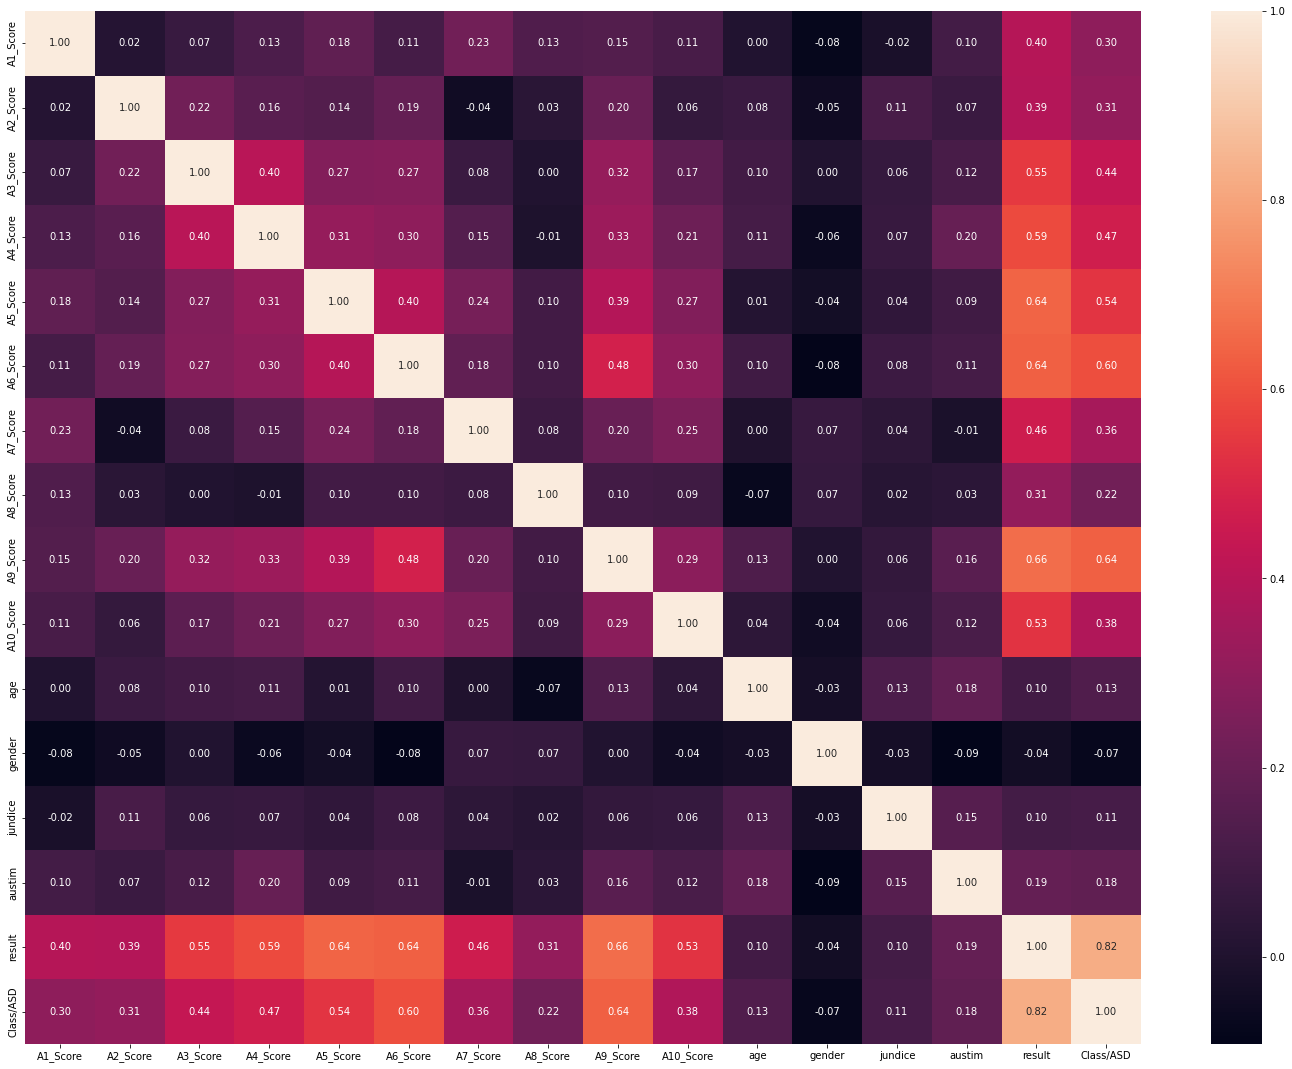

In [30]:
# wybor kolumn, gdzie korelacja jest wieksza niz 0.5
from matplotlib import pyplot as plt
import seaborn as sns

autism_corr= df.corr()
fig, ax = plt.subplots(1,1, figsize=(25, 1*len(df.columns)))
sns.heatmap(autism_corr, annot=True, fmt='.2f', ax=ax)
plt.show()

In [31]:
reg_05_cols = df.columns[ autism_corr["result"].abs() > 0.5  ].drop(["Class/ASD","result"])
clas_05_cols = df.columns[ autism_corr["Class/ASD"].abs() > 0.5  ].drop(["Class/ASD","result"])
# clas_05_cols ma mniej kolumn, poniewaz kolumny A1-A10 powinny generalnie korelowac z "results", a kolumna "Class/ASD" jest pozbawiona zaleznosci od A1-A10 dla malych sum(A1-A10), tzn ponizej sumy zliczen ==8 nie zalezy od wartosci A1-A10

IndexError: boolean index did not match indexed array along dimension 0; dimension is 19 but corresponding boolean dimension is 16

# Model liniowy - regresja

In [32]:
regr = LinearRegression().fit(X_train, Y_train_reg)
Y_pred = regr.predict(X_test)
print("R2", regr.score(X_test, Y_test_reg))
# The coefficients
print("Coefficients: \n", regr.coef_)
# The mean squared error
mse = mean_squared_error(Y_test_reg, Y_pred)
print("Mean squared error: %.2e" % mean_squared_error(Y_test_reg, Y_pred))
# The coefficient of determination: 1 is perfect prediction
print("Coefficient of determination: %.2f" % r2_score(Y_test_reg, Y_pred))

/home/ania/PycharmProjects/wtad_przykl_kol/venv/lib/python3.8/site-packages/sklearn/utils/validation.py:964: FutureWarning: Arrays of bytes/strings is being converted to decimal numbers if dtype='numeric'. This behavior is deprecated in 0.24 and will be removed in 1.1 (renaming of 0.26). Please convert your data to numeric values explicitly instead.
  X = check_array(


ValueError: Unable to convert array of bytes/strings into decimal numbers with dtype='numeric'

# Model liniowy - klasyfikacja

In [33]:
# regresja logistyczna w scikit-learn nie lubi nieustandaryzowanych danych
pipe = make_pipeline(StandardScaler(), LogisticRegression())
pipe.fit(X_train, Y_train_clas)
Y_pred_clas = pipe.predict(X_test)
# R^2
print("R2",pipe.score(X_test, Y_test_clas) )
# confusion
conf = pd.crosstab(Y_pred_clas, Y_test_clas)
print(conf)
# accuracy
print("accuracy/dokladnosc", conf.values.diagonal().sum()/conf.sum().sum())

ValueError: could not convert string to float: 'asian'

# Model liniowy - regresja - kolumny skorelowane powyzej 0.5

In [144]:
regr = LinearRegression().fit(X_train[reg_05_cols], Y_train_reg)
Y_pred = regr.predict(X_test[reg_05_cols])
print("R2", regr.score(X_test[reg_05_cols], Y_test_reg))
# The coefficients
print("Coefficients: \n", regr.coef_)
print("Mean squared error: %.2e" % mean_squared_error(Y_test_reg, Y_pred))

R2 0.853893128844831
Coefficients: 
 [1.07742666 0.95240006 1.29965286 1.29793875 1.37132206 1.18336314]
Mean squared error: 9.62e-01


# Model liniowy - klasyfikacja- kolumny skorelowane powyzej 0.5

In [143]:
# regresja logistyczna w scikit-learn nie lubi nieustandaryzowanych danych
pipe = make_pipeline(StandardScaler(), LogisticRegression())
pipe.fit(X_train[clas_05_cols], Y_train_clas)
Y_pred_clas = pipe.predict(X_test[clas_05_cols])
# mean accuracy
print("mean accuracy",pipe.score(X_test[clas_05_cols], Y_test_clas) )
# confusion
conf = pd.crosstab(Y_pred_clas, Y_test_clas)
print(conf)

mean accuracy 0.8739130434782608
Class/ASD    0   1
row_0             
0          152  19
1           10  49


In [ ]:
# modele uwzgledniajace wszystkie kolumny zawieraja duzo nieistotnych zmiennych
# przez co model jest przetrenowany (R2 i accuracy == 1)
# model z kolumnami o korelacji z targetem powyzej 0.5 nie jest przetrenowany i wciaz jest poprawny,
# ponieważ i tak R2 jest bliskie 1.

# SVM regresja, caly zbior

In [175]:
regr = make_pipeline(StandardScaler(), SVR())
# domyslna funkcja jadrowa to rbf
regr.fit(X_train, Y_train_reg)
print("R2 na zb testowym", regr.score(X_test, Y_test_reg))
print("R2 na zb treningowym", regr.score(X_train, Y_train_reg))
Y_pred = regr.predict(X_test)
print("Mean squared error: %.2e" % mean_squared_error(Y_test_reg, Y_pred))

R2 na zb testowym 0.9894298242272359
R2 na zb treningowym 0.9969234398611594
Mean squared error: 6.96e-02


# SVM - klasyfikacja - caly zbior

In [174]:
clf = make_pipeline(StandardScaler(), SVC())
# domyslna funkcja jadrowa to rbf
clf.fit(X_train, Y_train_clas)
Y_pred_clas = clf.predict(X_test)
# mean accuracy
print("mean accuracy test",clf.score(X_test, Y_test_clas) )
print("mean accuracy train",clf.score(X_train, Y_train_clas) )
# confusion
conf = pd.crosstab(Y_pred_clas, Y_test_clas)
print(conf)

mean accuracy test 0.9608695652173913
mean accuracy train 0.9934640522875817
Class/ASD    0   1
row_0             
0          161   8
1            1  60


# SVM - regresja - kolumny skorelowane powyzej 0.5

In [176]:
regr = make_pipeline(StandardScaler(), SVR())
# domyslna funkcja jadrowa to rbf
regr.fit(X_train[reg_05_cols], Y_train_reg)
Y_pred = regr.predict(X_test[reg_05_cols])
print("R2 zb test", regr.score(X_test[reg_05_cols], Y_test_reg))
print("R2 zb train", regr.score(X_train[reg_05_cols], Y_train_reg))
print("Mean squared error: %.2e" % mean_squared_error(Y_test_reg, Y_pred))

R2 zb test 0.8363823825577476
R2 zb train 0.8498281308934147
Mean squared error: 1.08e+00


# SVM - klasyfikacja - kolumny skorelowane powyzej 0.5

In [177]:
clf = make_pipeline(StandardScaler(), SVC())
# domyslna funkcja jadrowa to rbf
clf.fit(X_train[clas_05_cols], Y_train_clas)
Y_pred_clas = clf.predict(X_test[clas_05_cols])
# mean accuracy
print("mean accuracy test",clf.score(X_test[clas_05_cols], Y_test_clas) )
print("mean accuracy train",clf.score(X_train[clas_05_cols], Y_train_clas) )
# confusion
conf = pd.crosstab(Y_pred_clas, Y_test_clas)
print(conf)

mean accuracy test 0.8739130434782608
mean accuracy train 0.8932461873638344
Class/ASD    0   1
row_0             
0          152  19
1           10  49


# Tuning SVM do klasyfikacji

In [179]:
# defining parameter range
param_grid = {'C': range(1,100+10,10),
              'gamma': np.arange(0, 0.5+0.01, 0.01),
              'kernel': ['rbf']}

grid = GridSearchCV(SVC(), param_grid, refit = True, verbose = 3)

# fitting the model for grid search
grid.fit(X_train[clas_05_cols], Y_train_clas)

Fitting 5 folds for each of 561 candidates, totalling 2805 fits
[CV 1/5] END ........C=1, gamma=0.0, kernel=rbf;, score=0.750 total time=   0.0s
[CV 2/5] END ........C=1, gamma=0.0, kernel=rbf;, score=0.750 total time=   0.0s
[CV 3/5] END ........C=1, gamma=0.0, kernel=rbf;, score=0.750 total time=   0.0s
[CV 4/5] END ........C=1, gamma=0.0, kernel=rbf;, score=0.739 total time=   0.0s
[CV 5/5] END ........C=1, gamma=0.0, kernel=rbf;, score=0.747 total time=   0.0s
[CV 1/5] END .......C=1, gamma=0.01, kernel=rbf;, score=0.870 total time=   0.0s
[CV 2/5] END .......C=1, gamma=0.01, kernel=rbf;, score=0.848 total time=   0.0s
[CV 3/5] END .......C=1, gamma=0.01, kernel=rbf;, score=0.902 total time=   0.0s
[CV 4/5] END .......C=1, gamma=0.01, kernel=rbf;, score=0.880 total time=   0.0s
[CV 5/5] END .......C=1, gamma=0.01, kernel=rbf;, score=0.890 total time=   0.0s
[CV 1/5] END .......C=1, gamma=0.02, kernel=rbf;, score=0.870 total time=   0.0s
[CV 2/5] END .......C=1, gamma=0.02, kernel=r

GridSearchCV(estimator=SVC(),
             param_grid={'C': range(1, 110, 10),
                         'gamma': array([0.  , 0.01, 0.02, 0.03, 0.04, 0.05, 0.06, 0.07, 0.08, 0.09, 0.1 ,
       0.11, 0.12, 0.13, 0.14, 0.15, 0.16, 0.17, 0.18, 0.19, 0.2 , 0.21,
       0.22, 0.23, 0.24, 0.25, 0.26, 0.27, 0.28, 0.29, 0.3 , 0.31, 0.32,
       0.33, 0.34, 0.35, 0.36, 0.37, 0.38, 0.39, 0.4 , 0.41, 0.42, 0.43,
       0.44, 0.45, 0.46, 0.47, 0.48, 0.49, 0.5 ]),
                         'kernel': ['rbf']},
             verbose=3)

In [180]:
# print best parameter after tuning
print(grid.best_params_)

# print how our model looks after hyper-parameter tuning
print(grid.best_estimator_)

{'C': 1, 'gamma': 0.02, 'kernel': 'rbf'}
SVC(C=1, gamma=0.02)


In [181]:
# blad na zbiorze testowym
grid.score(X_test[clas_05_cols], Y_test_clas)

0.8695652173913043

In [182]:
# blad na zbiorze treningowym
grid.score(X_train[clas_05_cols], Y_train_clas)

0.8932461873638344

In [ ]:
# Tuning SVM do regresji

In [183]:
# defining parameter range
param_grid = {'C': range(1,100+10,10),
              'gamma': np.arange(0, 0.5+0.01, 0.01),
              'kernel': ['rbf']}

grid = GridSearchCV(SVR(), param_grid, refit = True, verbose = 3)

# fitting the model for grid search
grid.fit(X_train[reg_05_cols], Y_train_reg)

Fitting 5 folds for each of 561 candidates, totalling 2805 fits
[CV 1/5] END .......C=1, gamma=0.0, kernel=rbf;, score=-0.091 total time=   0.0s
[CV 2/5] END .......C=1, gamma=0.0, kernel=rbf;, score=-0.087 total time=   0.0s
[CV 3/5] END .......C=1, gamma=0.0, kernel=rbf;, score=-0.138 total time=   0.0s
[CV 4/5] END .......C=1, gamma=0.0, kernel=rbf;, score=-0.077 total time=   0.0s
[CV 5/5] END .......C=1, gamma=0.0, kernel=rbf;, score=-0.040 total time=   0.0s
[CV 1/5] END .......C=1, gamma=0.01, kernel=rbf;, score=0.774 total time=   0.0s
[CV 2/5] END .......C=1, gamma=0.01, kernel=rbf;, score=0.791 total time=   0.0s
[CV 3/5] END .......C=1, gamma=0.01, kernel=rbf;, score=0.791 total time=   0.0s
[CV 4/5] END .......C=1, gamma=0.01, kernel=rbf;, score=0.779 total time=   0.0s
[CV 5/5] END .......C=1, gamma=0.01, kernel=rbf;, score=0.798 total time=   0.0s
[CV 1/5] END .......C=1, gamma=0.02, kernel=rbf;, score=0.810 total time=   0.0s
[CV 2/5] END .......C=1, gamma=0.02, kernel=r

GridSearchCV(estimator=SVR(),
             param_grid={'C': range(1, 110, 10),
                         'gamma': array([0.  , 0.01, 0.02, 0.03, 0.04, 0.05, 0.06, 0.07, 0.08, 0.09, 0.1 ,
       0.11, 0.12, 0.13, 0.14, 0.15, 0.16, 0.17, 0.18, 0.19, 0.2 , 0.21,
       0.22, 0.23, 0.24, 0.25, 0.26, 0.27, 0.28, 0.29, 0.3 , 0.31, 0.32,
       0.33, 0.34, 0.35, 0.36, 0.37, 0.38, 0.39, 0.4 , 0.41, 0.42, 0.43,
       0.44, 0.45, 0.46, 0.47, 0.48, 0.49, 0.5 ]),
                         'kernel': ['rbf']},
             verbose=3)

In [184]:
# print best parameter after tuning
print(grid.best_params_)

# print how our model looks after hyper-parameter tuning
print(grid.best_estimator_)

{'C': 41, 'gamma': 0.01, 'kernel': 'rbf'}
SVR(C=41, gamma=0.01)


In [170]:
# blad na zbiorze testowym
grid.score(X_test[reg_05_cols], Y_test_reg)

0.8482038881055566

In [172]:
# blad na zbiorze treningowym
grid.score(X_train[reg_05_cols], Y_train_reg)

0.8438128809696455